<a href="https://colab.research.google.com/github/Mahender-224/Data-Science-Assignments/blob/main/Dogs_and_Cats_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dogs and Cats classification using cnn. At first tried to build a model using the cnn, was able to reach the accuracy around 80-82%. Later implemented model using pre-trained model VGG(by Tranfer Learning) by using the weights of imageNet and was able to reach accuracy aroound 92-94%.

Here in VGG, I haven't trained the convolution layers and pooling layer, I have added the extra layer with 160 neurons and trained.

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# for unzipping the downloaded file

import zipfile

zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

there is large dataset to train, so RAM space will not be enough. So, keras uses a generators

**Generators:**
Here total dataset is divided into batches and then trained

In [ ]:
# Here let's use imgae-dataset-from-directory generator
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


Every value of image is between 0-255, we need to normalize it to 0-1

In [ ]:
# Normalize
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

Now the dataset is ready. now let's create a model

In [ ]:
# Create cnn model

model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), padding = 'valid', activation = 'relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 128)     

In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 68s 104ms/step - loss: 0.6401 - accuracy: 0.6370 - val_loss: 0.5537 - val_accuracy: 0.7140
Epoch 2/10
625/625 [==============================] - 54s 86ms/step - loss: 0.4770 - accuracy: 0.7720 - val_loss: 0.4714 - val_accuracy: 0.7786
Epoch 3/10
625/625 [==============================] - 52s 83ms/step - loss: 0.3591 - accuracy: 0.8382 - val_loss: 0.4397 - val_accuracy: 0.8080
Epoch 4/10
625/625 [==============================] - 52s 83ms/step - loss: 0.2243 - accuracy: 0.9078 - val_loss: 0.5234 - val_accuracy: 0.8042
Epoch 5/10
625/625 [==============================] - 53s 84ms/step - loss: 0.1190 - accuracy: 0.9528 - val_loss: 0.7570 - val_accuracy: 0.8000
Epoch 6/10
625/625 [==============================] - 53s 85ms/step - loss: 0.0796 - accuracy: 0.9706 - val_loss: 0.8105 - val_accuracy: 0.8042
Epoch 7/10
625/625 [==============================] - 53s 85ms/step - loss: 0.0522 - accuracy: 0.9809 - val_loss: 1.0247 - val_accuracy

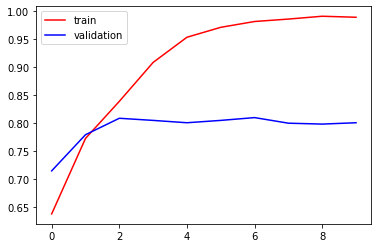

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label = 'train')
plt.plot(history.history['val_accuracy'], color='blue', label = 'validation')
plt.legend()
plt.show()

From above we can see that there is a lot of variance between training and validation data. that means overfitting is happening

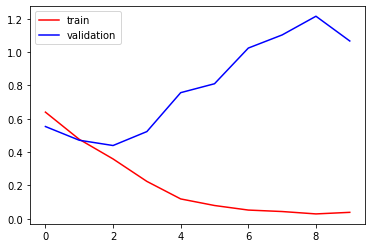

In [ ]:
plt.plot(history.history['loss'], color='red', label = 'train')
plt.plot(history.history['val_loss'], color='blue', label = 'validation')
plt.legend()
plt.show()

Ways to reduce overfitting
1. Add More data
2. Data Augmentation
3. L1/L2 Regularization
4. Dropout
5. Batch Norm
6. Reduce Complexity

In [ ]:
# Let's try out using batch normalization
model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), padding = 'valid', activation = 'relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 69s 106ms/step - loss: 1.2465 - accuracy: 0.5602 - val_loss: 0.7338 - val_accuracy: 0.6146
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.6395 - accuracy: 0.6359 - val_loss: 0.6315 - val_accuracy: 0.6782
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5811 - accuracy: 0.7058 - val_loss: 0.5378 - val_accuracy: 0.7392
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5114 - accuracy: 0.7475 - val_loss: 0.5024 - val_accuracy: 0.7642
Epoch 5/10
625/625 [==============================] - 66s 104ms/step - loss: 0.4570 - accuracy: 0.7857 - val_loss: 0.4848 - val_accuracy: 0.7792
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3942 - accuracy: 0.8136 - val_loss: 0.5488 - val_accuracy: 0.7646
Epoch 7/10
625/625 [==============================] - 66s 106ms/step - loss: 0.3442 - accuracy: 0.8408 - val_loss: 0.5639 - val_ac

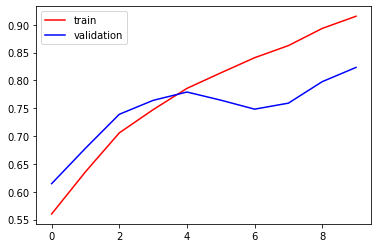

In [ ]:
plt.plot(history.history['accuracy'], color='red', label = 'train')
plt.plot(history.history['val_accuracy'], color='blue', label = 'validation')
plt.legend()
plt.show()

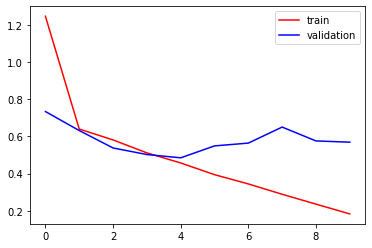

In [ ]:
plt.plot(history.history['loss'], color='red', label = 'train')
plt.plot(history.history['val_loss'], color='blue', label = 'validation')
plt.legend()
plt.show()

In [ ]:
# Let's predict on new dog image
import cv2

In [ ]:
test_img = cv2.imread('/content/test/dogs/dog.100.jpg')

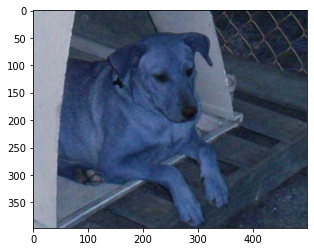

In [ ]:
plt.imshow(test_img)
plt.show()

In [ ]:
test_img.shape

(397, 500, 3)

In [ ]:
test_img = cv2.resize(test_img, (256, 256))

In [ ]:
test_input = test_img.reshape((1, 256, 256, 3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 1s 651ms/step


array([[1.]], dtype=float32)

Therefore dog is predicted correctly, whose label is 1

In [ ]:
test_img = cv2.imread('/content/test/cats/cat.10.jpg')
test_img = cv2.resize(test_img, (256, 256))
test_input = test_img.reshape((1, 256, 256, 3))
model.predict(test_input)

1/1 [==============================] - 0s 25ms/step


array([[4.1518008e-11]], dtype=float32)

**Using Transfer Learning**

In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
# Let's try to use the weights of imageNet pre_trained model and let's stop re_training of convolution layer again
vgg = VGG16(weights='imagenet', 
           include_top=False,
           input_shape=(256,256,3))

In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
model = Sequential()

model.add(vgg)

model.add(Flatten())

model.add(Dense(160, activation = 'relu'))

model.add(Dropout(0.2))

model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 32768)             0         
                                                                 
 dense_14 (Dense)            (None, 160)               5243040   
                                                                 
 dropout_3 (Dropout)         (None, 160)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                 161       
                                                                 
Total params: 19,957,889
Trainable params: 19,957,889
Non-trainable params: 0
_________________________________________________________________


In [ ]:
vgg.trainable = False

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 32768)             0         
                                                                 
 dense_14 (Dense)            (None, 160)               5243040   
                                                                 
 dropout_3 (Dropout)         (None, 160)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                 161       
                                                                 
Total params: 19,957,889
Trainable params: 5,243,201
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 147s 233ms/step - loss: 0.2668 - accuracy: 0.8978 - val_loss: 0.1844 - val_accuracy: 0.9206
Epoch 2/10
625/625 [==============================] - 146s 233ms/step - loss: 0.1486 - accuracy: 0.9392 - val_loss: 0.1467 - val_accuracy: 0.9398
Epoch 3/10
625/625 [==============================] - 146s 233ms/step - loss: 0.1232 - accuracy: 0.9495 - val_loss: 0.1485 - val_accuracy: 0.9354
Epoch 4/10
625/625 [==============================] - 132s 210ms/step - loss: 0.1090 - accuracy: 0.9570 - val_loss: 0.1594 - val_accuracy: 0.9336
Epoch 5/10
625/625 [==============================] - 146s 233ms/step - loss: 0.0969 - accuracy: 0.9617 - val_loss: 0.1444 - val_accuracy: 0.9362
Epoch 6/10
625/625 [==============================] - 146s 233ms/step - loss: 0.0710 - accuracy: 0.9711 - val_loss: 0.1539 - val_accuracy: 0.9400
Epoch 7/10
625/625 [==============================] - 146s 233ms/step - loss: 0.0618 - accuracy: 0.9735 - val_loss: 0.2911 -

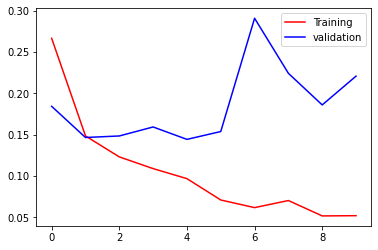

In [ ]:
plt.plot(history.history["loss"], color="red", label = "Training")
plt.plot(history.history["val_loss"], color="blue", label = "validation")
plt.legend()
plt.show()

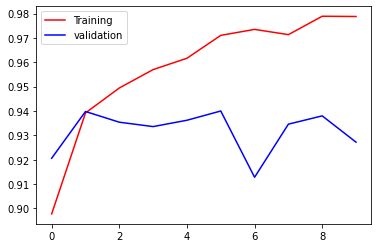

In [ ]:
plt.plot(history.history["accuracy"], color="red", label = "Training")
plt.plot(history.history["val_accuracy"], color="blue", label = "validation")
plt.legend()
plt.show()

In [ ]:
test_img = cv2.imread('/content/test/cats/cat.10.jpg')
test_img = cv2.resize(test_img, (256, 256))
test_input = test_img.reshape((1, 256, 256, 3))
model.predict(test_input)

1/1 [==============================] - 1s 649ms/step


array([[0.]], dtype=float32)

In [ ]:
test_img = cv2.imread('/content/test/dogs/dog.100.jpg')
test_img = cv2.resize(test_img, (256, 256))
test_input = test_img.reshape((1, 256, 256, 3))
model.predict(test_input)

1/1 [==============================] - 0s 25ms/step


array([[1.]], dtype=float32)